In [1]:
import os
import numpy as np
from hd_pk import cmb_from_pk
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['figure.dpi'] = 250

# Figure 2: $P_\mathrm{m}(k)$

In this notebook, we load in the pre-computed data points and plot them to create Figure 2.

__If you use this plot or any of the data, please cite:__

- [MacInnis and Sehgal (2024)](https://arxiv.org/abs/2405.12220) for the CMB-HD data points, which were derived in a separate notebook, `hd_lensing_snr.ipynb`.
- [Sabti et. al. (2021)](https://arxiv.org/abs/2110.13161) for the HST UV LF data points.
- [Chabanier et. al. (2019)](https://arxiv.org/abs/1905.08103) for the other data points, which we obtained from [https://github.com/marius311/mpk_compilation](https://github.com/marius311/mpk_compilation). Our plot is based on Figure 1 of that work.

---

To save the plot:
- change `save = False` to `save = True`
- (optional) change the `plot_dir` to the absolute path of the directory where you want to save the plot, e.g. `plot_dir = '/path/to/plots'`. By default, this is whatever directory you're running this notebook from.

In [2]:
save = False
plot_dir = os.getcwd()

In [3]:
plot_fname = os.path.join(plot_dir, 'fig02_pk.pdf')
if save:
    print('The file name for the plot will be :', plot_fname)

To include data points for an SO-like experiment on the plot, set `include_SOlike = True` in the cell below. __Note__ that these are not official Simons Observatory forecasts. These data points were calculated using the same methods used for HD.

In [4]:
include_SOlike = False

---

Below, we load theory linear matter power spectrum, and the data points from the different data sets. The wavenumbers $k$ are in units of $h$/Mpc, and the power spectrum is in units of (Mpc/$h$)$^3$.



In [5]:
# get the absolute path to the directory where everything is saved:
pk_data_dir = os.path.join(cmb_from_pk.hd_pk_dir(), 'pk_plot_data')
pk_data_path = lambda x: os.path.join(pk_data_dir, x)

# load in the linear P(k) theory:
theo_ks, theo_Pks = np.loadtxt(pk_data_path('theory_pk_lin.txt'), unpack=True)

# make a list of data sets to plot:
data_set_names = ['hd']
if include_SOlike:
    data_set_names.append('so')
data_set_names += ['uvlf', 'lya', 'des', 'sdss', 'planck_phi', 'planck_ee', 'planck_tt']
# only some of the data sets have error bars on k (in the x-direction); keep track of them here:
has_k_errs = {'hd': False,
              'so': False,
              'uvlf': True,
              'sdss': False,
              'lya': False,
              'des': True,
              'planck_tt': True,
              'planck_ee': True,
              'planck_phi': True}

# loop through the data sets and load the data into dictionaries:
ks = {} # holds the wavenumbers of the data points
Pks = {} # holds P(k) at each point
k_errs = {} # holds the error bar(s) on k
Pk_errs = {} # holds the error bar(s) on P(k)
for name in data_set_names:
    ks[name] = np.loadtxt(pk_data_path(f'{name}_ks.txt'))
    if has_k_errs[name]:
        k_errs[name] = np.loadtxt(pk_data_path(f'{name}_k_errs.txt'))
    Pks[name] = np.loadtxt(pk_data_path(f'{name}_Pks.txt'))
    Pk_errs[name] = np.loadtxt(pk_data_path(f'{name}_Pk_errs.txt'))

We use dictionaries to store the legend label and color used for each data set in the plot, and the order in which the points should appear on the plot:

In [6]:
# legend labels:
plt_labels = {'hd': r"CMB-HD lensing from $TT,TE,EE,BB,\kappa\kappa$",
              'so': r"SO-like lensing from $TT,TE,EE,BB,\kappa\kappa$",
              'uvlf': 'HST UV LF',
              'sdss': "SDSS DR7 LRG",
              'lya': r"eBOSS DR14 Ly-$\alpha$ forest",
              'des': "DES Y1 cosmic shear",
              'planck_tt': "Planck 2018 TT",
              'planck_ee': "Planck 2018 EE",
              'planck_phi': r"Planck 2018 $\phi\phi$"}
# colors:
plt_colors = {'hd': 'tab:red',
              'so': 'tab:orange',
              'uvlf': 'darkcyan',
              'sdss': '#d477a5',
              'lya': '#7d53a3',
              'des': '#a18257',
              'planck_tt': 'steelblue',
              'planck_ee': 'tab:olive',
              'planck_phi': '#3c633c'}
# order of the points (in an effort to make them all visible):
zorders = {'hd': 10,
           'so': 1,
           'uvlf': 3,
           'sdss': -5,
           'lya': -4,
           'des': 4,
           'planck_tt': -1,
           'planck_ee': -2,
           'planck_phi': -3}

---

__To add your own data points__:

- Choose a name to use as the dictionary keys for your data, e.g. `'mydata'`.
- Add that name to the `data_set_names` list: e.g., `data_set_names.append('mydata')`
- Load in your data points and store them in the dictionaries defined above:
  - The points $k, P(k)$ should be 1D arrays with length `number_of_ks`. Add them to the dictionaries `ks` and `Pks`, respectively, with your key name (e.g., `ks['mydata']`).
  - The error bars on $P(k)$ should be a 1D array with length `number_of_ks` if they are symmetric, or 2D arrays of shape `(2, number_of_ks)` if the upper and lower error bars are not equal. Add them to the `Pk_errs` dictionary.
    - Note: if your error bars aren't symmetric, the average of the upper and lower error bars are used as the $\sigma$ in the lower panel of the Figure by default. You can replace this with your own calculation.
    - (see the `matplotlib.pyplot.errorbar` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) for more information about the array shape)
  - If there are error bars on $k$: the same rules as above apply to the shape of the array. Add them to the `k_errs` dictionary.
- Specify a legend label and a color for your data in the `plt_labels` and `plt_colors` dictionaries.

For example:

```
my_key = 'mydata'
data_set_names.append(my_key)

# load your data here

ks[my_key] = # your array of wavenumbers
Pks[my_key] = # your array of P(k) at each point k
Pk_errs[my_key] = # your array of error bars on P(k)
k_errs[my_key] = # your array of error bars on k; this is optional

plt_labels[my_key] = 'My data'
plt_colors[my_key] = # any color that matplotlib understands
```

---

We plot a mass scale on the upper x-axis, as was done in [Hlozek et. al. (2011)](https://arxiv.org/abs/1105.4887). The mass is given by $$M_c = (4\pi / 3) \rho_\mathrm{m} (\pi / k_c)^3,$$ where $\rho_\mathrm{m}$ is the matter density  and $k_c$ is in units of Mpc$^{-1}$. We calculate this below:

In [7]:
Omega_m =  0.3153
h = 0.67
rho_crit = h**2 * 2.775e11 # critical density, units of solar masses per Mpc^3
rho_m = Omega_m * rho_crit

M = lambda k: (4 * np.pi / 3) * rho_m * (np.pi / k)**3
# we will also use the inverse function to get k_c from M_c,
k_c = lambda M_c: np.pi / (M_c / ((4 * np.pi / 3) * rho_m ))**(1/3)

---

Now we make the plot:

findfont: Font family ['dejavusans'] not found. Falling back to DejaVu Sans.


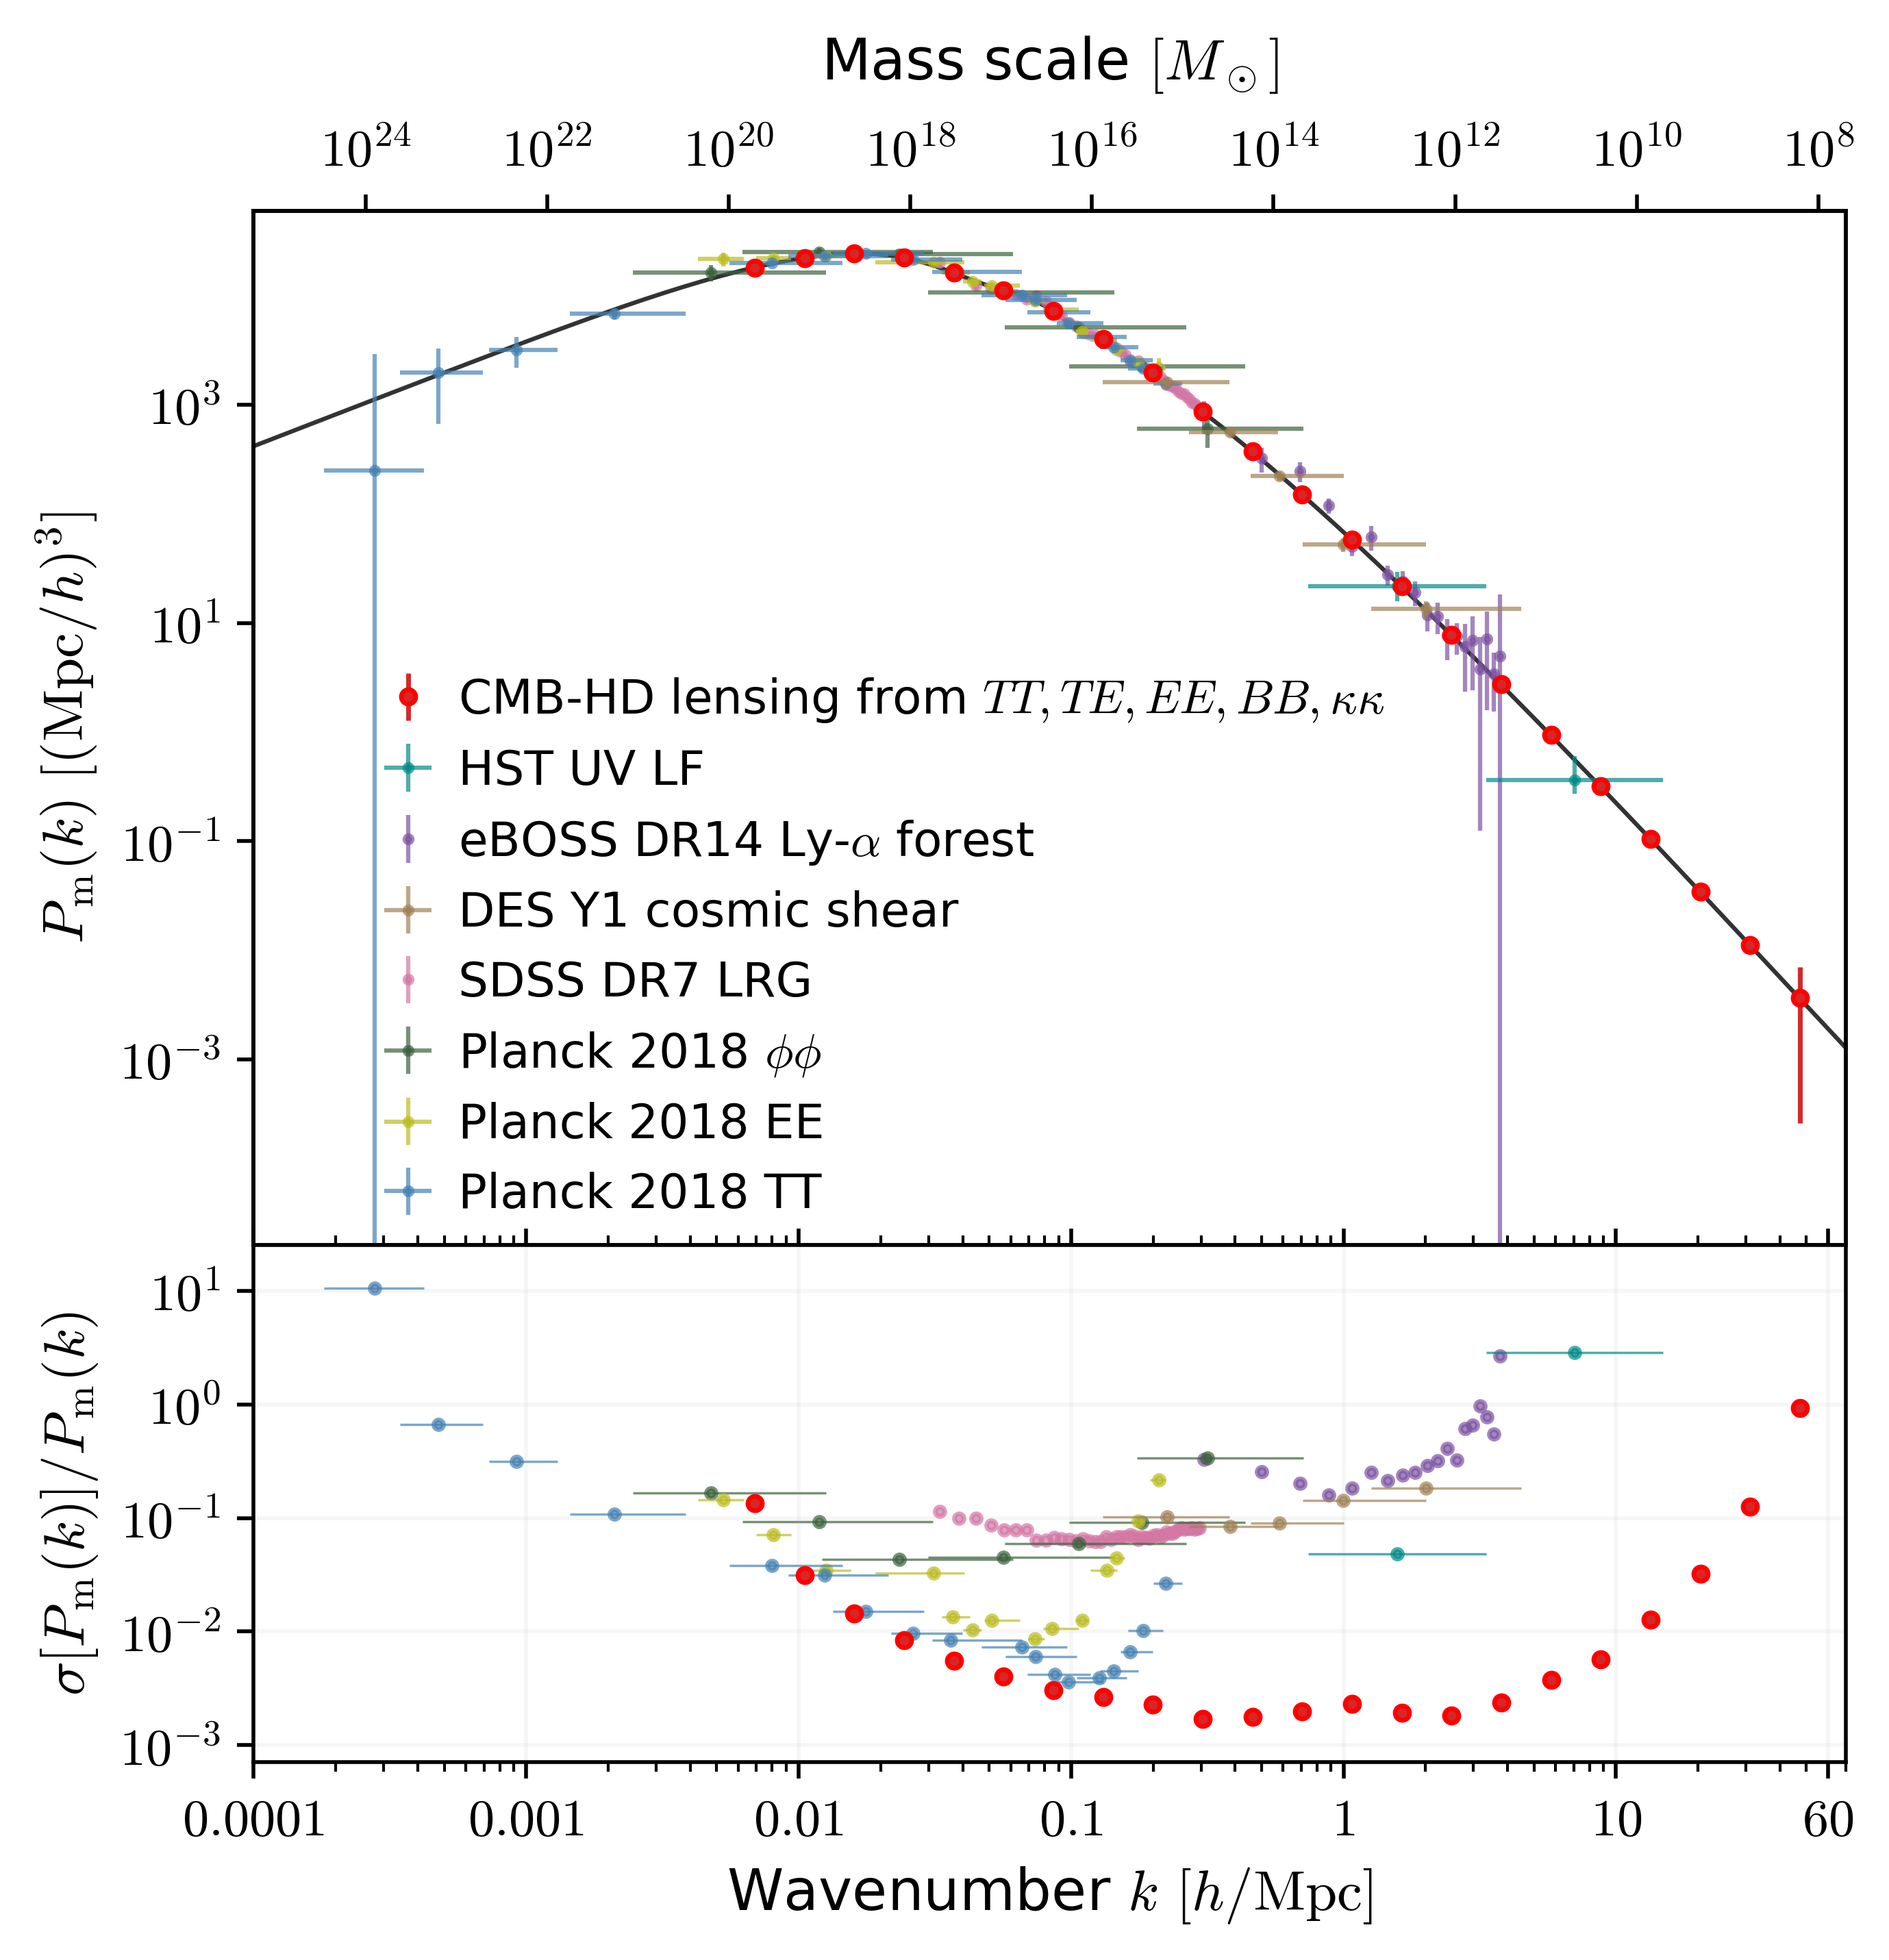

In [8]:
marker = '.'
mew = 1
markersize = 3
elw = 0.9
alpha=0.7

xmin = 1e-4
xmax = 70
xticks = [10**i for i in range(-4,3)]
xticks[-1] = 60

# create the figure
fig = plt.figure(dpi=500, facecolor='w', figsize=(6,6))

# top panel:
ax = fig.add_subplot(3,1,(1,2))
ax.margins(0.1)

# plot the linear matter power spectrum
ax.plot(theo_ks, theo_Pks, color='k', alpha=0.8, lw=0.9, zorder=-10)

# plot points for CMB-HD
ax.errorbar(ks['hd'], Pks['hd'], yerr=Pk_errs['hd'],  
            label=plt_labels['hd'], color=plt_colors['hd'], zorder=zorders['hd'],
            ls='none', marker=marker, markeredgewidth=mew, markeredgecolor='r',
            markersize=markersize+3, elinewidth=1)

for key in data_set_names[1:]:
    if key in k_errs.keys():
        xerr = k_errs[key]
    else:
        xerr = None
    if key in zorders.keys():
        zorder = zorders[key]
    else:
        zorder = None
    ax.errorbar(ks[key], Pks[key], yerr=Pk_errs[key], xerr=xerr,
                label=plt_labels[key], zorder=zorder, color=plt_colors[key],
                alpha=alpha, marker=marker, markeredgewidth=mew, 
                markersize=markersize, elinewidth=elw, ls='none')

ax.legend(frameon=False, loc=(0.055, 0.008), handletextpad=0.05)
ax.set_xlim([xmin, xmax])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$P_\mathrm{m}(k)~[({\rm Mpc}/h)^3]$', fontsize=12)
ax.set_xticks(xticks)
ax.set_xticklabels([r''  for tick in xticks])
ytick_exps = [-3, -1, 1, 3, 5]
yticks = [10**exp for exp in ytick_exps]
yticklabels = [r'$10^{%d}$' % exp for exp in ytick_exps]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.tick_params(labelsize=11)
ax.tick_params(axis='x', direction='in', which='both')
ax.set_ylim([2e-5, 6e4])

# plot the mass scale on top
ax2 = ax.twiny()
ax2.set_xlim([xmin, xmax])
ax2.set_xlabel(r'Mass scale $[M_\odot]$', fontsize=12, labelpad=10)
ax2.set_xscale('log')
ax2.minorticks_off()
M_exps = list(range(8, 25, 2))[::-1]
Mticks = [10**exp for exp in M_exps]
xticks2 = [k_c(M)/h for M in Mticks]
xticklabels2 = [r'$10^{%d}$' % exp for exp in M_exps]
ax2.set_xticks(xticks2, minor=False)
ax2.set_xticklabels(xticklabels2, fontsize=11, fontfamily='dejavusans')

# bottom panel:
ax3 = fig.add_subplot(3,1,3)
ax3.margins(0.1)
ax3.errorbar(ks['hd'], Pk_errs['hd']/Pks['hd'], color=plt_colors['hd'], zorder=zorders['hd'],
            ls='none', marker=marker, markeredgewidth=mew, markeredgecolor='r',
            markersize=markersize+3, elinewidth=1)
for key in data_set_names[1:]:
    if len(Pk_errs[key].shape) > 1: # take error bar range / 2
        pk_errs = np.array(Pk_errs[key][1][0] - Pk_errs[key][0][0], Pk_errs[key][1][1] - Pk_errs[key][0][1]) / 2
    else:
        pk_errs  = Pk_errs[key]
    if key in k_errs.keys():
        xerr = k_errs[key]
    else:
        xerr = None
    if key in zorders.keys():
        zorder = zorders[key]
    else:
        zorder = None
    ax3.errorbar(ks[key], pk_errs/Pks[key], xerr=xerr,
                 label=plt_labels[key], zorder=zorder, color=plt_colors[key],
                 alpha=alpha, marker=marker, markeredgewidth=mew, 
                 markersize=markersize+1, elinewidth=0.5, ls='none')

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(alpha=0.1)
ax3.set_xticks(xticks)
ax3.set_xticklabels([r'$%s$' % str(tick) for tick in xticks])
ax3.set_xlim([xmin, xmax])
ax3.set_xlabel(r'Wavenumber $k$ $[h/{\rm Mpc}]$', fontsize=12)
ytick_exps = [-3, -2, -1, 0, 1]
yticks = [10**exp for exp in ytick_exps]
yticklabels = [r'$10^{%d}$' % exp for exp in ytick_exps]
ax3.set_yticks(yticks)
ax3.set_yticklabels(yticklabels)
ax3.set_ylabel(r'$\sigma\left[P_\mathrm{m}(k)\right] / P_\mathrm{m}(k)$', fontsize=12)
ax3.tick_params(labelsize=11)

plt.subplots_adjust(hspace=0)
if save:
    plt.savefig(plot_fname, bbox_inches='tight', dpi=500)
plt.show()